In [723]:
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, AdamW
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.nn import CrossEntropyLoss
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split


In [724]:

base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'

metadata = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

part1 = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2 = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

# Dictionary to store image paths
image_path_dict = {}

# Load image paths from part1 and part2 folders
for folder in [part1, part2]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Remove ".jpg" from filename to get ID
            image_path_dict[image_id] = os.path.join(folder, filename)

metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Check for missing image paths
print(metadata[metadata['image_path'].isnull()])

print(metadata.head())




Empty DataFrame
Columns: [lesion_id, image_id, dx, dx_type, age, sex, localization, image_path]
Index: []
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  
0  /Users/binitachhetri/Downloads/CapstoneProject...  
1  /Users/binitachhetri/Downloads/CapstoneProject...  
2  /Users/binitachhetri/Downloads/CapstoneProject...  
3  /Users/binitachhetri/Downloads/CapstoneProject...  
4  /Users/binitachhetri/Downloads/CapstoneProject...  


#####
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}

In [725]:

metadata = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata.csv')

#'dx' column to 'cell_type'
metadata.rename(columns={'dx': 'cell_type'}, inplace=True)

# Dictionary to map abbreviations to full names
cell_type_mapping = {
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

# Apply the mapping to the 'cell_type' column
metadata['cell_type'] = metadata['cell_type'].map(cell_type_mapping)

print(metadata.head())

metadata.to_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_modified.csv', index=False)


     lesion_id      image_id                      cell_type dx_type   age  \
0  HAM_0000118  ISIC_0027419  Benign keratosis-like lesions   histo  80.0   
1  HAM_0000118  ISIC_0025030  Benign keratosis-like lesions   histo  80.0   
2  HAM_0002730  ISIC_0026769  Benign keratosis-like lesions   histo  80.0   
3  HAM_0002730  ISIC_0025661  Benign keratosis-like lesions   histo  80.0   
4  HAM_0001466  ISIC_0031633  Benign keratosis-like lesions   histo  75.0   

    sex localization  
0  male        scalp  
1  male        scalp  
2  male        scalp  
3  male        scalp  
4  male          ear  


In [726]:

base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'

metadata = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata_modified.csv'))

part1 = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2 = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

image_path_dict = {}

for folder in [part1, part2]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Remove ".jpg" from filename to get ID
            image_path_dict[image_id] = os.path.join(folder, filename)

metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Check for missing image paths
print(metadata[metadata['image_path'].isnull()])

print(metadata.head())



Empty DataFrame
Columns: [lesion_id, image_id, cell_type, dx_type, age, sex, localization, image_path]
Index: []
     lesion_id      image_id                      cell_type dx_type   age  \
0  HAM_0000118  ISIC_0027419  Benign keratosis-like lesions   histo  80.0   
1  HAM_0000118  ISIC_0025030  Benign keratosis-like lesions   histo  80.0   
2  HAM_0002730  ISIC_0026769  Benign keratosis-like lesions   histo  80.0   
3  HAM_0002730  ISIC_0025661  Benign keratosis-like lesions   histo  80.0   
4  HAM_0001466  ISIC_0031633  Benign keratosis-like lesions   histo  75.0   

    sex localization                                         image_path  
0  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
1  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
2  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
3  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
4  male          ear  /Users/binitachhetri/Downloads/C

In [728]:
metadata = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_with_paths.csv')

#Augmentations (resize, normalize for ViT input)
image_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((384, 384)),  # Resize to match ViT input size
    transforms.ToTensor(),  # Convert to PyTorch Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize to [-1, 1] range
])

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  
    return image_transforms(image)

# Load one sample image and its label for testing
sample_image_path = metadata['image_path'].iloc[2000]
sample_label = metadata['cell_type'].iloc[2000] 

sample_image = load_image(sample_image_path)

print(f"Image Tensor Shape: {sample_image.shape}")
print(f"Label: {sample_label}")


Image Tensor Shape: torch.Size([3, 384, 384])
Label: Melanoma


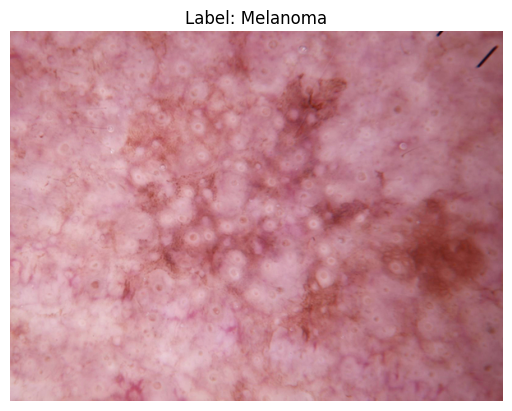

In [796]:
sample_image = Image.open('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_images_part_2/ISIC_0029930.jpg')
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}") 
plt.axis('off')  
plt.show()


In [730]:
metadata.isnull().sum()

lesion_id        0
image_id         0
cell_type        0
dx_type          0
age             57
sex              0
localization     0
image_path       0
dtype: int64

In [731]:
metadata['age'].fillna((metadata['age'].mean()), inplace=True)

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_4459/648827771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata['age'].fillna((metadata['age'].mean()), inplace=True)


In [732]:
metadata.isnull().sum()

lesion_id       0
image_id        0
cell_type       0
dx_type         0
age             0
sex             0
localization    0
image_path      0
dtype: int64

In [733]:
print(metadata.dtypes)

lesion_id        object
image_id         object
cell_type        object
dx_type          object
age             float64
sex              object
localization     object
image_path       object
dtype: object


<Axes: xlabel='cell_type'>

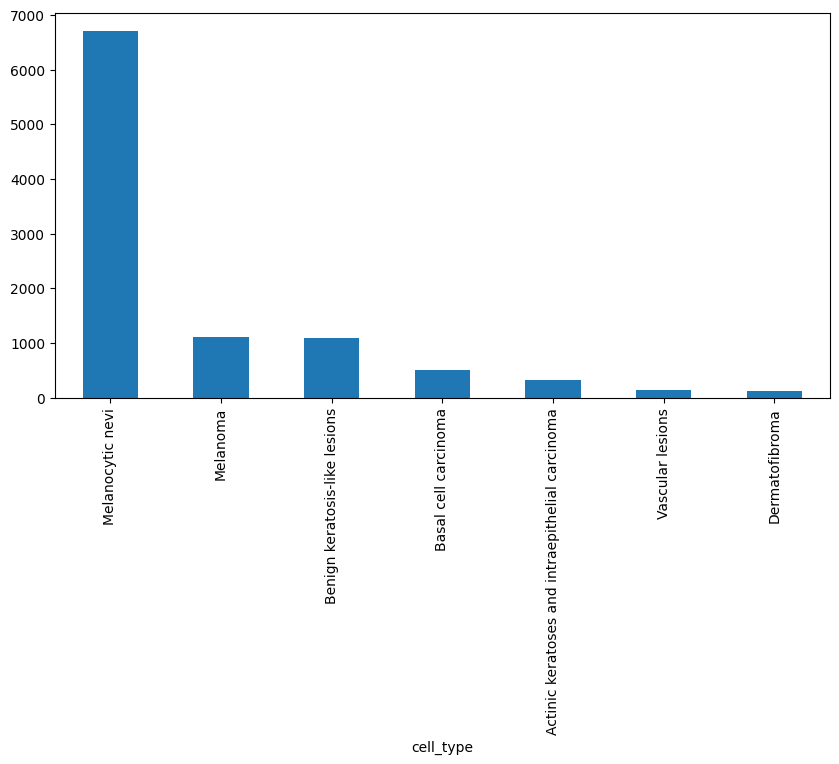

In [734]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
metadata['cell_type'].value_counts().plot(kind='bar', ax=ax1)


<Axes: xlabel='dx_type'>

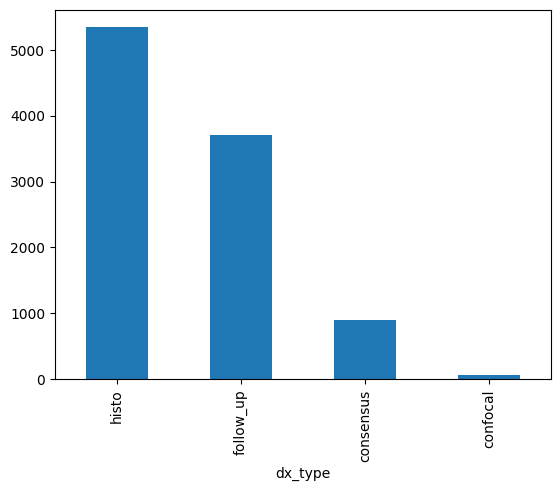

In [735]:
metadata['dx_type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='localization'>

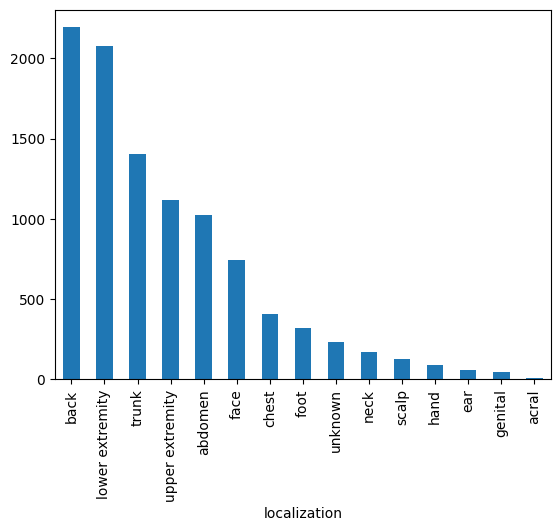

In [736]:
metadata['localization'].value_counts().plot(kind='bar')

<Axes: >

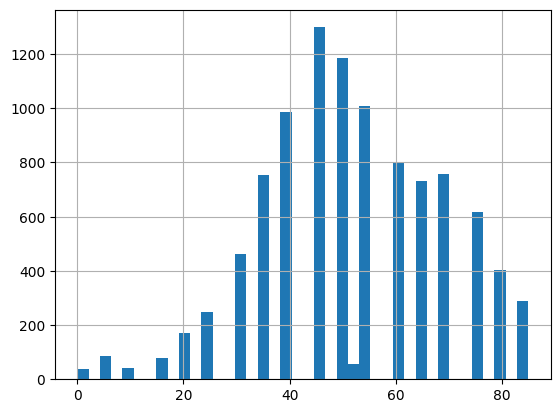

In [737]:
metadata['age'].hist(bins=40)

<Axes: xlabel='sex'>

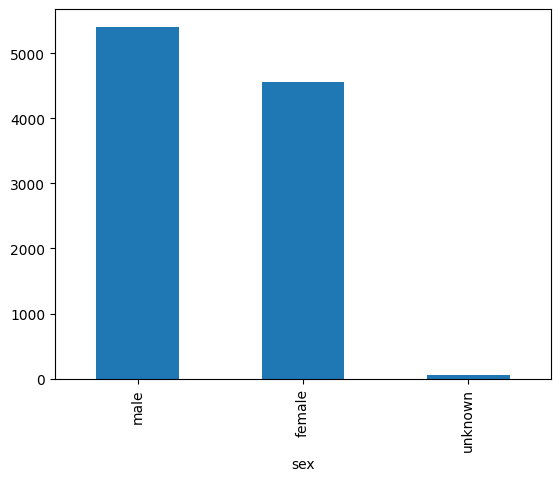

In [738]:
metadata['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='cell_type'>

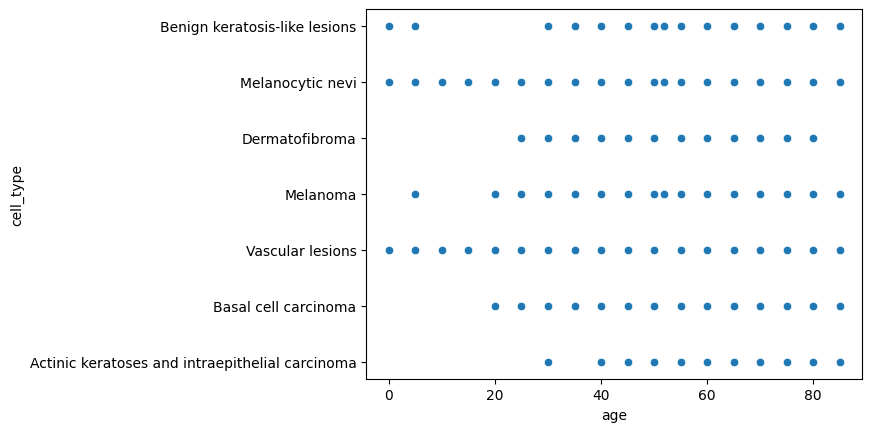

In [739]:
import seaborn as sns
sns.scatterplot(x = 'age', y = 'cell_type',data=metadata)

In [740]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
metadata['cell_type_encoded'] = label_encoder.fit_transform(metadata['cell_type'])

In [741]:
label_mapping = {
    'Melanoma': 1,
    'Basal cell carcinoma': 0,
    'Melanocytic nevi': 2,
    'Benign keratosis-like lesions': 3,
    'Actinic keratoses and intraepithelial carcinoma': 6,
    'Dermatofibroma': 5,
    'Vascular lesions':4
}
    
  



In [742]:
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, transform=None, indices=None):
        if indices is not None:
            self.metadata = metadata.iloc[indices]
        else:
            self.metadata = metadata

        self.transform = transform
        
        # Define label mapping
        self.label_mapping = {label: idx for idx, label in enumerate(metadata['cell_type'].unique())}
        
    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_path = self.metadata.iloc[idx]['image_path']
        label = self.metadata.iloc[idx]['cell_type']
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        image = torch.clamp(image, 0, 1)  

        encoded_label = self.label_mapping[label]  # Encode the label
        return image, torch.tensor(encoded_label, dtype=torch.long)



In [743]:
import random
indices = list(range(len(metadata)))
random.shuffle(indices)
total_size = len(metadata)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size 


In [744]:
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

In [745]:
print("Train indices:", train_indices)
print("Validation indices:", val_indices)
print("Test indices:", test_indices)



Train indices: [3787, 5752, 5031, 191, 9174, 675, 7845, 5373, 1662, 9542, 6171, 8965, 6551, 3548, 2722, 7338, 2433, 5850, 7713, 5027, 9516, 3377, 613, 5778, 2285, 7836, 8179, 5706, 5595, 1136, 5801, 2466, 7128, 8274, 9833, 3032, 6393, 807, 8162, 4188, 3753, 3531, 1752, 5376, 7267, 9214, 7597, 5926, 1372, 6005, 7485, 3093, 8482, 1854, 8741, 2902, 4756, 1188, 4939, 5899, 6067, 2855, 1008, 1398, 6711, 5738, 6548, 7497, 8246, 7957, 9778, 971, 2185, 4435, 1718, 7353, 6754, 6182, 9766, 9435, 3729, 7041, 2896, 9314, 3261, 8397, 570, 4593, 7107, 3569, 2245, 4600, 9136, 2541, 4512, 9199, 7073, 688, 1208, 2792, 4549, 990, 2332, 2105, 6134, 8338, 3425, 7567, 9656, 1330, 2958, 922, 1664, 6629, 1852, 2404, 5394, 4475, 7274, 9398, 7524, 5174, 6749, 7496, 3313, 5201, 4411, 8091, 1992, 9610, 4276, 4405, 5900, 2075, 5587, 8606, 7035, 9445, 7126, 4972, 4071, 34, 9558, 8897, 7303, 8478, 1884, 1837, 124, 238, 8966, 3712, 6665, 4120, 6371, 9354, 4971, 6991, 9816, 9876, 6944, 563, 1984, 2397, 3723, 8681, 69

In [746]:
train_dataset = SkinCancerDataset(metadata=metadata, transform=image_transforms, indices=train_indices)
val_dataset = SkinCancerDataset(metadata=metadata, transform=image_transforms, indices=val_indices)
test_dataset = SkinCancerDataset(metadata=metadata, transform=image_transforms, indices=test_indices)

print(f"Train dataset length: {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")
print(f"Test dataset length: {len(test_dataset)}")

Train dataset length: 8012
Validation dataset length: 1001
Test dataset length: 1002


In [747]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check DataLoader lengths
print(f"Train DataLoader length: {len(train_dataloader)}")
print(f"Validation DataLoader length: {len(val_dataloader)}")
print(f"Test DataLoader length: {len(test_dataloader)}")

Train DataLoader length: 251
Validation DataLoader length: 32
Test DataLoader length: 32


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([32, 3, 384, 384])
tensor([1, 1, 5, 1, 1, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1, 1,
        3, 1, 1, 0, 1, 1, 2, 1])
Plotting image 0 with label 1
Plotting image 1 with label 1
Plotting image 2 with label 5
Plotting image 3 with label 1
Plotting image 4 with label 1


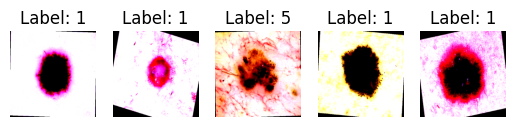

In [759]:
# Display a batch of images and labels
for images, labels in train_dataloader:
    print(type(images), type(labels)) 
    print(images.shape) 
    print(labels)  
    
    # Display the first 5 images in the batch
    for i in range(5):
        print(f'Plotting image {i} with label {labels[i]}')
        plt.subplot(1, 5, i + 1)  
        plt.imshow(images[i].permute(1, 2, 0))  
        plt.title(f'Label: {labels[i].item()}')  
        plt.axis('off')  
    plt.show()
    break 

In [749]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch32-384")
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch32-384", 
    num_labels=7,  # Adjusting for HAM10000 dataset
    ignore_mismatched_sizes=True
)


/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/.venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch32-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [750]:
model.train()  # Set the model to training mode
optimizer = AdamW(model.parameters(), lr=0.00002)
criterion = CrossEntropyLoss()
num_epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    for batch in train_dataloader:
        images, labels = batch  # Get a batch of images and labels
        
        # Ensure images are transformed before passing them to the feature extractor
        inputs = feature_extractor(images=images, return_tensors="pt", do_rescale=False).pixel_values.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  
        outputs = model(inputs).logits 
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step() 

    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  
        for batch in val_dataloader:
            images, labels = batch
            inputs = feature_extractor(images=images, return_tensors="pt").pixel_values.to(device)
            labels = labels.to(device)
            outputs = model(inputs).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()  
            
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    val_accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss / len(val_dataloader):.4f}, Val Accuracy: {val_accuracy:.4f}")


/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/.venv/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch [1/100], Loss: 1.4456, Val Loss: 1.4644, Val Accuracy: 0.6653
Epoch [2/100], Loss: 1.2635, Val Loss: 1.2521, Val Accuracy: 0.6653
Epoch [3/100], Loss: 1.2231, Val Loss: 1.2379, Val Accuracy: 0.6653
Epoch [4/100], Loss: 1.2950, Val Loss: 1.3096, Val Accuracy: 0.6653
Epoch [5/100], Loss: 1.2291, Val Loss: 1.2459, Val Accuracy: 0.6653
Epoch [6/100], Loss: 1.2111, Val Loss: 1.2149, Val Accuracy: 0.6653
Epoch [7/100], Loss: 1.2097, Val Loss: 1.2148, Val Accuracy: 0.6653
Epoch [8/100], Loss: 1.2443, Val Loss: 1.2428, Val Accuracy: 0.6653
Epoch [9/100], Loss: 1.2367, Val Loss: 1.2369, Val Accuracy: 0.6653
Epoch [10/100], Loss: 1.2273, Val Loss: 1.2279, Val Accuracy: 0.6653
Epoch [11/100], Loss: 1.2732, Val Loss: 1.2556, Val Accuracy: 0.6653
Epoch [12/100], Loss: 1.3067, Val Loss: 1.2913, Val Accuracy: 0.6653
Epoch [13/100], Loss: 1.2107, Val Loss: 1.2200, Val Accuracy: 0.6653
Epoch [14/100], Loss: 1.3410, Val Loss: 1.3209, Val Accuracy: 0.6653
Epoch [15/100], Loss: 1.3360, Val Loss: 1.3

In [751]:
torch.save(model.state_dict(), 'model_weights3.pth')


Predicted class: Melanoma with confidence: 0.94


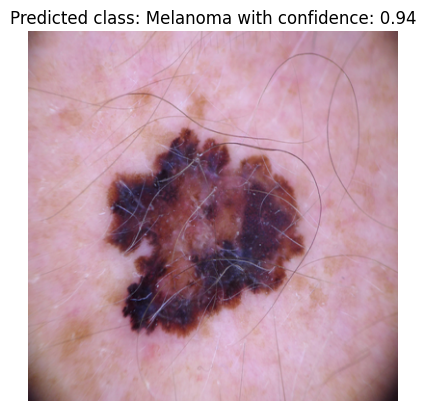

In [810]:
# using our trained model to make a prediction

import torch.nn.functional as F
transform = transforms.Compose([
    transforms.Resize((384, 384)),  # Resize to 384x384
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],       # Normalize the image (adjust if needed)
        std=[0.5, 0.5, 0.5]
    )
])

model.eval()  

img_path = "/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_images_part_2/ISIC_0030824.jpg"  
image = Image.open(img_path).convert("RGB") 

# Apply the transformation
image = transform(image).unsqueeze(0)  

class_names = {
    1: 'Melanoma',
    0: 'Basal cell carcinoma',
    2: 'Melanocytic nevi',
    3: 'Benign keratosis-like lesions',
    6: 'Actinic keratoses and intraepithelial carcinoma',
    5: 'Dermatofibroma',
    4: 'Vascular lesions'
}

with torch.no_grad():  
    outputs = model(image).logits  # Forward pass to get outputs
    probabilities = F.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()  # Get predicted class
    confidence_score = probabilities[0, predicted_class].item()
predicted_class_name = class_names[predicted_class]

print(f"Predicted class: {predicted_class_name} with confidence: {confidence_score:.2f}")

# Convert tensor to NumPy array and transpose dimensions for display
image_to_display = image.squeeze(0).permute(1, 2, 0).numpy() 

# Denormalize
image_to_display = (image_to_display * 0.5) + 0.5 

# Display the image
plt.imshow(image_to_display)
plt.axis('off') 
plt.title(f"Predicted class: {predicted_class_name} with confidence: {confidence_score:.2f}")  
plt.show()  

In [812]:
# This is to see what the actual class/cell type directly from the skin datasets, '0030824', '0025244', '0024475'

test = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata.csv')
image_id_value = 'ISIC_0030824'
matching_row = test[test['image_id']== image_id_value]
print(matching_row)

        lesion_id      image_id   dx dx_type   age   sex localization
1427  HAM_0000330  ISIC_0030824  mel   histo  60.0  male        chest


In [753]:
import pickle

# Save the datasets
with open('train_dataset.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)
with open('val_dataset.pkl', 'wb') as f:
    pickle.dump(val_dataset, f)
with open('test_dataset.pkl', 'wb') as f:
    pickle.dump(test_dataset, f)


In [754]:
with open('train_dataset.pkl', 'rb') as f:
    train_dataset = pickle.load(f)



In [758]:
true_labels = []
predicted_labels = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

with torch.no_grad():  
    for images, labels in train_dataloader:
        images = images.to(device)  
        labels = labels.to(device)

        # Get predictions
        outputs = model(images).logits
        _, preds = torch.max(outputs, 1)  # Get the predicted class indices

       
        true_labels.extend(labels.cpu().numpy())  
        predicted_labels.extend(preds.cpu().numpy())  
        #print(true_labels)
        #print(predicted_labels)

In [756]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.811377245508982
Precision: 0.8283661354713596
Recall: 0.811377245508982
F1 Score: 0.7949954059450132
Confusion Matrix:
[[ 79  24   1   1   0   4   7]
 [ 19 635   2   0  10   6   1]
 [  0   0   7   0   0   2   1]
 [ 20  44   1  23   2   9   3]
 [  1   2   0   0  15   0   0]
 [  7   5   0   0   0  37   2]
 [  5   3   0   0   0   7  17]]


In [757]:
print(f"Test Dataset Length: {len(val_dataloader.dataset)}")
print(f"Test Dataset Length: {len(train_dataloader.dataset)}")



Test Dataset Length: 1001
Test Dataset Length: 8012
